A Simple Digit Recognizer from the infamous MNIST dataset. This is actually called the "Hello World!" for Neural Networks. The project is taking help from a kaggle note book adn two you tube videos.

1. Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math) by Samson Zhang - https://www.youtube.com/watch?v=w8yWXqWQYmU
2. Neural networks Series by 3Blue1Brown (First 4 videos are good enough for the project) - https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi


In [ ]:
#Importing the needed libraries and connecting to the dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data  =pd.read_csv("train.csv")

In [8]:
data = np.array(data)
m,n = data.shape
print(m,n)

42000 785


In [21]:
# There could be a chance the dataset will be ordered, so we shuffle it
np.random.shuffle(data) 

#Splitting the adatset into dev and training sets and transposing it

#Dev dataset
data_dev=data[1:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
# Normalizing the data from 0–255 (grayscale) to 0–1
X_dev= X_dev/255.0 

#Training dataset
data_train=data[1000:m].T
Y_train= data_train[0]
X_train=data_train[1:n]
X_train=X_train/255.0

_,m_train=X_train.shape

In [22]:
m_train

41000

Neural Network Architecture
Input Layer a[0]:

    784 units

    One for each pixel in a 28×28 image

Hidden Layer a[1]:

    10 units

    Uses ReLU activation function

Output Layer a[2]:

    10 units

    One for each digit class (0–9)

    Uses Softmax activation to output class probabilities

In [24]:
#Defining the input parameters or initial weight and biases for the neural network

def init_params():
    W1=np.random.rand(10,784)-0.5 #to keeep the values between 0.5 and -0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1, b1, W2, b2


#Lets define the ReLu activation function
def ReLU(Z):
    return np.maximum(0, Z) #there is still possibility for making it faster- i will come back for this later

#Lets define the softmax function- will help convert the activation values into proobabilities
def softmax(Z):
    A= np.exp(Z)/sum(np.exp(Z))
    return A

#Lets define the forward propogation function
def forward_prop(W1, b1, W2, b2, X):
    Z1= np.dot(W1, X) + b1
    A1=ReLU(Z1)
    Z2= np.dot(W2, A1) + b2
    A2= softmax(Z2)
    return Z1, A1, Z2, A2

#Lets define the one-hot encoding function
def one_hot(Y):
    one_hot_Y= np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y

#Lets define the ReLU derivative function
def ReLU_deriv(Z):
    return Z>0

#Lets define the backward propogation function
def backward_prop(W1, Z1, A1, W2, A2, Z2, X, Y):
    one_hot_Y=one_hot(Y)
    dZ2= A2- one_hot_Y
#Each column of A1 is the activation from the hidden layer for one example, and each column of dZ2 is the error signal for the same example. and hence we transponse A1
    dW2=1/m*np.dot(dZ2,A1.T)
    db2= 1/m*np.sum(dZ2)
    dZ1=np.dot(W2.T,dZ2)*ReLU_deriv(Z1) #called the hadamard product (element wise multiplication to keep the gradient only whre the neuron was active Z1>0
    dW1=1/m*np.dot(dZ1,X.T)
    db1=1/m*np.sum(dZ1)
    return dW1, db1, dW2, db2

#Lets define the update parameters function, also passing thhe hyper parameter learning rate- alpha
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1= W1-alpha*dW1
    b1= b1-alpha*db1
    W2= W2-alpha*dW2
    b2= b2-alpha*db2
    return W1, b1, W2, b2

In [25]:
#defining the get predictions function
def get_predictions(A2):
    return np.argmax(A2, axis=0)  #returns the index of the maximum value in each column of A2, which corresponds to the predicted class

#defining the accuracy function
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions== Y) / Y.size  #calculates the accuracy by comparing the predictions with the true labels Y and dividing by the total number of examples

#defining the gradient descent function
def gradient_descent(X,Y,alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(W1, Z1, A1, W2, A2, Z2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10==0:
            print("iteration: ", i)
            predictions= get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return  W1, b1, W2, b2

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

iteration:  0
[8 7 0 ... 6 8 5] [1 3 5 ... 1 1 2]
0.12482926829268293
iteration:  10
[7 7 0 ... 6 4 6] [1 3 5 ... 1 1 2]
0.19265853658536586
iteration:  20
[7 7 0 ... 6 7 6] [1 3 5 ... 1 1 2]
0.23307317073170733
iteration:  30
[7 7 0 ... 6 7 9] [1 3 5 ... 1 1 2]
0.2750975609756098
iteration:  40
[7 7 0 ... 6 7 9] [1 3 5 ... 1 1 2]
0.32041463414634147
iteration:  50
[8 7 0 ... 6 8 5] [1 3 5 ... 1 1 2]
0.3739512195121951
iteration:  60
[1 7 0 ... 8 8 1] [1 3 5 ... 1 1 2]
0.4458780487804878
iteration:  70
[1 7 0 ... 8 1 1] [1 3 5 ... 1 1 2]
0.49746341463414634
iteration:  80
[1 3 5 ... 8 1 1] [1 3 5 ... 1 1 2]
0.5399756097560976
iteration:  90
[1 3 5 ... 8 1 1] [1 3 5 ... 1 1 2]
0.5758536585365853
iteration:  100
[1 3 5 ... 8 1 1] [1 3 5 ... 1 1 2]
0.607390243902439
iteration:  110
[1 3 5 ... 8 1 1] [1 3 5 ... 1 1 2]
0.6355609756097561
iteration:  120
[1 3 5 ... 8 1 1] [1 3 5 ... 1 1 2]
0.6595121951219513
iteration:  130
[1 3 5 ... 8 1 1] [1 3 5 ... 1 1 2]
0.6795609756097561
iteration:  1

In [32]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

#lets test some predictiosn from our dev dataset
def test_predictions(index, W1, b1, W2, b2):
    current_image= X_train[:, index, None]
    prediction = make_predictions(current_image,W1, b1, W2, b2)
    label = Y_train[index]
    print(f"Prediction: {prediction}, Actual: {label}")
    
    digit= current_image.reshape((28, 28))*255
    plt.gray()
    plt.imshow(digit, interpolation='nearest')
    plt.show()

Prediction: [6], Actual: 6


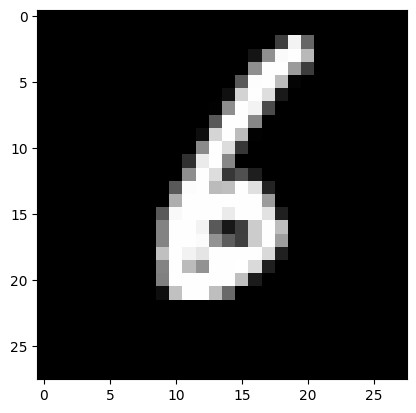

In [38]:
test_predictions(74, W1, b1, W2, b2)

In [39]:
#predictions on the dev dataset
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 2 9 9 6 0 5 7 1 4 6 3 1 8 4 4 7 1 8 2 5 4 0 3 9 7 0 6 1 4 8 5 3 9 8 1 6
 7 4 9 1 4 8 4 7 8 7 6 6 6 3 6 4 5 6 0 7 4 9 6 5 5 9 6 5 7 3 5 3 1 9 1 1 1
 3 5 6 2 5 3 4 4 3 7 7 8 3 9 8 1 8 2 4 8 7 1 1 7 1 2 9 3 4 7 9 6 5 9 7 0 9
 6 2 3 1 0 1 1 1 0 8 1 1 4 2 6 4 1 0 4 6 6 4 3 9 2 9 6 4 7 9 8 8 3 0 0 7 9
 9 8 3 3 1 8 2 5 3 1 9 7 3 9 4 8 6 3 9 1 8 2 9 2 7 8 9 0 3 0 1 1 6 9 7 1 2
 0 5 3 8 1 0 6 9 9 6 2 5 9 2 0 0 0 1 9 3 9 6 0 5 1 7 1 6 9 1 8 4 5 3 6 2 4
 8 1 6 6 1 2 6 4 7 6 7 0 7 0 3 8 3 8 9 0 0 8 5 3 2 9 3 2 5 6 9 4 1 1 5 0 9
 6 1 2 5 1 8 7 1 4 7 3 8 8 5 1 5 2 4 9 4 5 6 3 1 9 6 0 3 4 9 7 0 8 5 9 9 2
 2 4 1 3 7 6 8 7 7 9 9 2 1 6 1 3 1 7 7 8 8 9 9 9 0 3 0 6 4 5 0 2 0 6 6 3 9
 0 8 8 2 5 4 9 6 4 6 3 0 6 0 3 8 5 7 1 6 5 9 9 3 7 4 4 4 0 2 5 8 9 6 4 2 0
 0 5 2 9 0 3 1 8 2 8 2 6 7 6 7 4 0 7 1 3 0 8 7 1 2 1 6 5 5 1 1 1 8 1 8 9 6
 6 2 9 2 5 4 5 8 6 6 0 2 2 0 3 2 3 3 8 6 6 8 0 8 4 5 0 7 1 6 3 7 9 4 0 3 9
 5 8 0 6 1 4 8 4 3 5 2 9 2 5 8 1 7 3 5 0 7 7 4 0 5 5 1 4 0 2 5 6 1 1 0 7 6
 8 0 0 8 5 1 7 0 6 4 3 1 

np.float64(0.8558558558558559)